In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, cohen_kappa_score, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42 
plt.rcParams['font.family'] = 'Arial' 
plt.rcParams['font.size'] = 12
plt.rcParams['text.color'] = 'black'

# Figure 5A

In [2]:
df = pd.read_csv("./Input/08_cfRNA_vs_wbRNA.csv", index_col=0)
df = df.iloc[::-1].reset_index(drop=True) 
df

,Model,Samples,ROC-AUC_Value,ROC-AUC_Lower,ROC-AUC_Upper,Sensitivity_Value,Sensitivity_Lower,Sensitivity_Upper,Specificity_Value,Specificity_Lower,Specificity_Upper,Color
0,Sweeney3,757,0.880,0.840,0.920,0.812,0.760,0.857,0.800,0.762,0.835,#F27435
1,Zak16,49,0.931,0.814,1.000,0.886,0.733,0.968,0.929,0.661,0.998,#8C4360
2,Walter47,180,0.906,0.904,0.909,0.902,0.895,0.909,0.777,0.769,0.784,#06d6a0
3,Kaforou44,76,0.950,0.890,0.990,0.930,0.830,1.000,0.880,0.740,0.970,#ef476f
4,daCosta3,54,0.955,0.899,1.000,0.943,0.808,0.993,0.842,0.604,0.966,#fb8500
5,daCosta2,54,0.933,0.849,1.000,0.943,0.808,0.993,0.842,0.604,0.966,#ffb703
6,Berry86,116,0.947,0.873,1.000,0.900,0.683,0.988,0.792,0.697,0.868,#023047
7,Chang6,60,0.946,0.894,0.999,0.971,0.851,0.999,0.760,0.549,0.906,#219ebc
8,This paper,60,0.947,0.873,1.000,1.000,0.900,1.000,0.840,0.639,0.955,#8ecae6


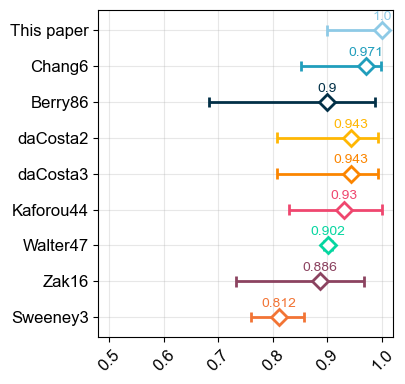

In [3]:
fig, ax = plt.subplots(figsize=(4.2, 4))

ax.grid(axis='both', linestyle='-', alpha=0.3, zorder=0)

for i in range(len(df)):
    ax.hlines(i, df['Sensitivity_Lower'][i], df['Sensitivity_Upper'][i], colors=df['Color'][i], linewidth=2, zorder=2)
    ax.vlines(df['Sensitivity_Lower'][i], i-0.15, i+0.15, colors=df['Color'][i], linewidth=2)
    ax.vlines(df['Sensitivity_Upper'][i], i-0.15, i+0.15, colors=df['Color'][i], linewidth=2)
    ax.plot(df['Sensitivity_Value'][i], i, marker='D', markersize=8, 
            markerfacecolor='white', markeredgecolor=df['Color'][i], 
            markeredgewidth=2, zorder=3)
    
    if df['Sensitivity_Value'][i]:
        ax.text(df['Sensitivity_Value'][i], i + 0.2, df['Sensitivity_Value'][i], 
                color=df['Color'][i], ha='center', va='bottom', fontsize=10)

ax.set_yticks(range(len(df)))
ax.set_yticklabels(df['Model'], fontsize=12)
ax.set_xticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.xticks(rotation=45)

ax.set_xlim(0.48, 1.02)
plt.tight_layout()
plt.savefig("./Output/09_Sensitivity.pdf", format='pdf', dpi=300, bbox_inches='tight')   
plt.show()

# Figure 5H/5I/5J

In [4]:
df = pd.read_csv('./Input/09_5_gene-pair_scores.csv', sep=',') 
df

,Sample,Score,cad4tb_score,qxr_score,lunit_score,group
0,02_test_PTB_Negative_Vietnam,0.999992,94.00,1.000,96.00,1
1,02_test_PTB_Negative_Vietnam.1,0.999992,96.00,1.000,97.00,1
2,02_test_PTB_Negative_Vietnam.3,0.999992,62.00,1.000,17.00,1
3,02_test_PTB_Negative_Vietnam.4,0.999992,91.00,1.000,90.00,1
4,02_test_PTB_Negative_Vietnam.5,0.020966,40.00,1.000,22.00,1
...,...,...,...,...,...,...
82,03_external_validation_PTB_Positive.2,0.999992,50.72,0.256,3.86,1
83,03_external_validation_PTB_Positive.3,0.913897,27.12,0.121,9.15,1
84,03_external_validation_PTB_Positive.4,0.999992,19.54,0.061,2.27,1
85,03_external_validation_PTB_Positive.5,0.995889,68.11,0.791,20.17,1


In [5]:
y_true = df['group'].values
cxr_scores = df['qxr_score'].values
fpr, tpr, thresholds = roc_curve(y_true, cxr_scores)
youden_index = tpr - fpr
best_threshold_idx = np.argmax(youden_index)
cxr_cutoff = thresholds[best_threshold_idx]
print(f"Optimal threshold (Youden Index): {cxr_cutoff:.4f}")

Optimal threshold (Youden Index): 0.3360


In [6]:
model_scores = df['Score'].values
best_model_cutoff = 0.5
model_preds = (model_scores >= best_model_cutoff).astype(int)
cxr_preds = (cxr_scores >= cxr_cutoff).astype(int)
kappa = cohen_kappa_score(model_preds, cxr_preds)
print(f"Kappa: {kappa:.4f}")

Kappa: 0.4214


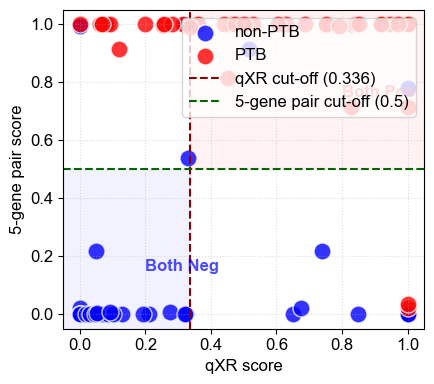

In [7]:
plt.figure(figsize=(4.5, 4))

colors_map = {1: 'red', 0: 'blue'}
labels_map = {1: 'PTB', 0: 'non-PTB'}
for label in [0, 1]:
    mask = (np.array(y_true) == label)
    plt.scatter(
        np.array(cxr_scores)[mask], 
        np.array(model_scores)[mask], 
        color=colors_map[label], 
        label=labels_map[label],
        alpha=0.8, 
        s=150,
        edgecolors='w'
    )

plt.axvline(x=cxr_cutoff, color='darkred', linestyle='--', linewidth=1.5, label=f'qXR cut-off ({cxr_cutoff})')
plt.axhline(y=best_model_cutoff, color='darkgreen', linestyle='--', linewidth=1.5, label=f'5-gene pair cut-off ({best_model_cutoff})')

plt.fill_between([cxr_cutoff, 1.05], best_model_cutoff, 1.05, color='red', alpha=0.05) 
plt.fill_between([-0.05, cxr_cutoff], -0.05, best_model_cutoff, color='blue', alpha=0.05) 

plt.xlabel('qXR score', fontsize=12)
plt.ylabel('5-gene pair score', fontsize=12)

plt.text(0.8, 0.75, 'Both Pos', fontsize=12, fontweight='bold', color='red', alpha=0.7)
plt.text(0.2, 0.15, 'Both Neg', fontsize=12, fontweight='bold', color='blue', alpha=0.7)

plt.legend(loc='upper right', frameon=True)
plt.grid(True, linestyle=':', alpha=0.4)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)

plt.tight_layout()
plt.savefig("./Output/10_qXR.pdf", format='pdf', dpi=300, bbox_inches='tight')   
plt.show()